# SYDE 556/750 --- Assignment 1
**Student ID: 00000000**

*Note:* Please include your numerical student ID only, do *not* include your name.

*Note:* Refer to the [PDF](https://github.com/celiasmith/syde556-f22/raw/master/assignments/assignment_01/syde556_assignment_01.pdf) for the full instructions (including some hints), this notebook contains abbreviated instructions only. Cells you need to fill out are marked with a "writing hand" symbol. Of course, you can add new cells in between the instructions, but please leave the instructions intact to facilitate marking.

In [1]:
# Import numpy and matplotlib -- you shouldn't need any other libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize # For question 2.1b)

# Fix the numpy random seed for reproducible results
np.random.seed(18945)

# Some formating options
%config InlineBackend.figure_formats = ['svg']

# 1. Representation of Scalars

## 1.1 Basic encoding and decoding

**a) Computing gain and bias.** In general, for a neuron model $a = G[J]$ (and assuming that the inverse $J = G^{-1}[a]$ exists), solve the following system of equations to compute the gain $\alpha$, and the bias $J^\mathrm{bias}$ given a maximum rate $a^\mathrm{max}$ and an $x$-intercept $\xi$.

$$a^\mathrm{max} = G[\alpha + J^\mathrm{bias}] \,, \quad\quad 0 = G[\alpha \xi + J^\mathrm{bias}] \,.$$

**Attached in Submission as 1_1A.png*

Now, simplify these equations for the specific case $G[J] = \max(J, 0)$.

✍ \<YOUR SOLUTION HERE\>

**b) Neuron tuning curves.** Plot the neuron tuning curves $a_i(x)$ for 16 randomly generated neurons following the intercept and maximum rate distributions described above.

In [2]:
# Import numpy and matplotlib -- you shouldn't need any other libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt


# https://en.wikipedia.org/wiki/Neural_coding
# https://en.wikipedia.org/wiki/Neural_decoding



def G_rlu(alpha, x, encoder, J_bias):
    J = alpha * (x * encoder) + J_bias
    G = J if J >= 0 else 0
    return G
    

def generate_tuning_curves(x_linspace, num_curves):
    
    tuning_curves = []
    
    for i in range(num_curves):
        
        a_max = np.random.uniform(100, 200)
        zeta = round(np.random.uniform(-0.95, 0.95), 2)
        encoder = np.random.choice(np.array([-1, 1]))
        
        alpha = a_max / (1 - zeta)
        J_bias = zeta * a_max / (zeta - 1)
                
        # This is a = G[J] = Max(J, 0), where J = alpha + J_bias
        
        tuning_curve = []
        for x in x_linspace:
            a_value = G_rlu(alpha, x, encoder, J_bias)
            tuning_curve.append(a_value)
            
        tuning_curves.append(tuning_curve)

    return tuning_curves
    
def plot_decoded_vs_ideal(x_linspace, X_hat, question_label, decoded_label):
    
    plt.plot(x_linspace, X_hat.T, color = "red", label="Decoded Response")
    plt.plot(x_linspace, x_linspace, color = "black", label="Real Response", linestyle="--")
    
    plt.title(question_label + " Decoded Vs Ideal, " + decoded_label)
    plt.xlabel("Represented X Value")
    plt.ylabel("Decoded X_hat")
    plt.xlim([-1, 1])
    plt.ylim([np.amin(X_hat), np.amax(X_hat)])
    plt.ylim([-1, 1])
    plt.legend()
    plt.grid()
    plt.show()

    plt.grid()
    plt.title(question_label + " Decoded Minus Ideal, " + decoded_label)
    plt.xlabel("Represented X value")
    plt.ylabel("X_hat - x")
    plt.xlim([-1, 1])
    plt.ylim([np.amin(X_hat), np.amax(X_hat)])
    plt.ylim([-1, 1])
    plt.plot(x_linspace, X_hat.T - np.matrix(x_linspace).T)
    plt.show()
    
def get_RMSE(y_actual, y_predicted):
    rms = round(sqrt(mean_squared_error(y_actual, y_predicted)), 2)
    return rms


np.random.seed(9)

    
N = 16
S = 41

# B) [DONE]
print("B) ")

x_linspace = np.linspace(-1, 1, S)

tuning_curves = generate_tuning_curves(x_linspace, N)

for tuning_curve in tuning_curves:
    plt.plot(x_linspace, tuning_curve)

plt.title("1.1B) 16 RLU Tuning Curves")
plt.xlabel("Current")
plt.ylabel("Frequency")
plt.xlim([-1, 1])
plt.show() # There is a slight elbow at the x axis when using delta_x = 0.05 on the plot. This is an artifact of the plot, not a feature of G[J] = max(0, J)
print()



B) 


**c) Computing identity decoders.** Compute the optimal identity decoder $\vec d$ for those 16 neurons (as shown in class). Report the value of the individual decoder coefficients. Compute $d$ using the matrix notation mentioned in the course notes. Do not apply any regularization. $A$ is the matrix of activities (the same data used to generate the plot in 1.1b).

In [3]:
#C) [DONE]
print("C) ")

A = np.matrix(tuning_curves)
X = np.matrix(x_linspace)

D = np.transpose(np.linalg.inv(A * np.transpose(A)) * A * np.transpose(X))

print("Optimal Decoders:")
print(D)
print()



C) 
Optimal Decoders:
[[ 2.63093740e-04  1.43073617e-02 -1.32585279e-04  1.34889179e-03
  -8.16265657e-04  1.19799734e-04 -1.13244098e-03 -3.04860633e-04
  -2.72200821e-03  6.68962199e-05  1.93101746e-05 -2.42023201e-03
   4.16055641e-04 -1.94586069e-03  1.46512994e-03 -3.95825531e-03]]



**d) Evaluating decoding errors.** Compute and plot $\hat{x}=\sum_i d_i a_i(x)$. Overlay on the plot the line $y=x$. Make a separate plot of $x-\hat{x}$ to see what the error looks like. Report the Root Mean Squared Error (RMSE) value.

D)


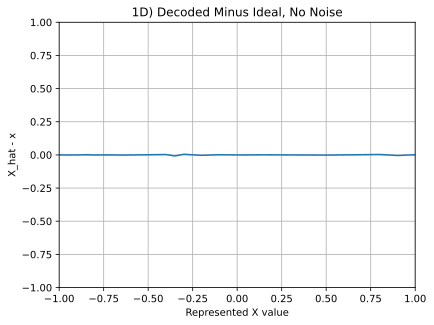

RMSE no noise no regularization:  0.0



In [4]:
#D) [DONE]
print("D)")
X_fit = D*A

plot_decoded_vs_ideal(x_linspace, X_fit, "1D)", "No Noise")

rmse_no_noise_no_reg = get_RMSE(np.asarray(X_fit)[0], x_linspace)
print("RMSE no noise no regularization: ", rmse_no_noise_no_reg)
print()



**e) Decoding under noise.** Now try decoding under noise. Add random normally distributed noise to $a$ and decode again. The noise is a random variable with mean $\mu=0$ and standard deviation of $\sigma=0.2 \max(A)$ (where $\max(A)$ is the maximum firing rate of all the neurons). Resample this variable for every different $x$ value for every different neuron. Create all the same plots as in part d). Report the RMSE.

E)


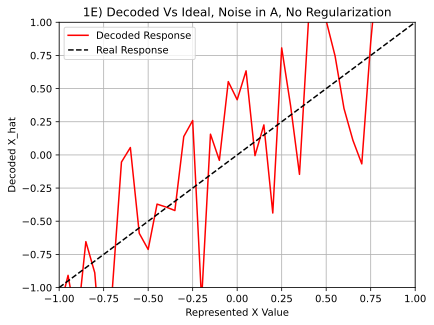

RMSE Noisy Tuning Curves No Regularization:  0.45



In [5]:
#E) [DONE]
print("E)")


ro = 0.2*np.max(A)

noise = np.zeros(A.shape)

for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        #ro = 0.2 * A[i, j]
        noise[i, j] = np.random.normal(0, ro)

A_noisy = np.copy(A)
A_noisy += noise

X_hat_noisy = D * A_noisy

plot_decoded_vs_ideal(x_linspace, X_hat_noisy, "1E)","Noise in A, No Regularization")
rmse_noisy_curves_no_reg = get_RMSE(np.asarray(X_hat_noisy)[0], x_linspace)
print("RMSE Noisy Tuning Curves No Regularization: ", rmse_noisy_curves_no_reg)
print()



**f) Accounting for decoder noise.** Recompute the decoder $\vec d$ taking noise into account (i.e., apply the appropriate regularization, as shown in class). Show how these decoders behave when decoding both with and without noise added to $a$ by making the same plots as in d) and e). Report the RMSE for all cases.

F)


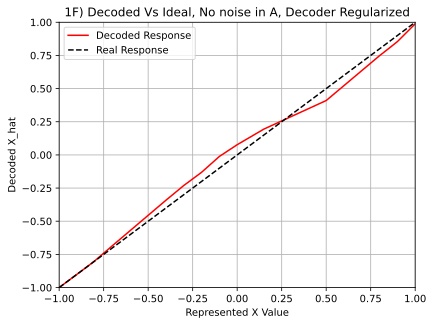

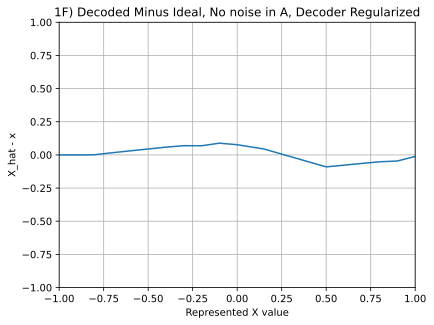

RMSE Regularization on curves without noise:  0.05


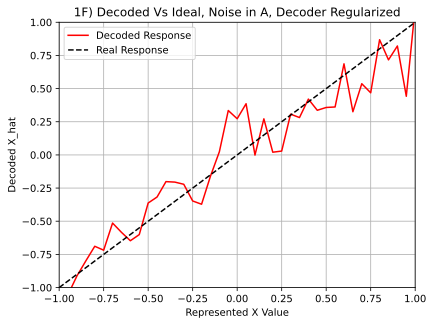

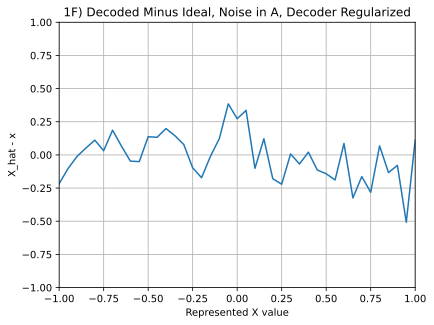

RMSE Regularization on noisy curves:  0.18

G)
[[0.0, 0.45], [0.05, 0.18]]


In [6]:
#F) [DONE]
print("F)")

regularizer = N*pow(ro, 2) * np.eye(N, N)
D_reg = np.transpose(np.linalg.inv(A * A.T + regularizer) * A * np.transpose(X))

X_hat_reg = D_reg * A
X_hat_noisy_reg = D_reg * A_noisy

plot_decoded_vs_ideal(x_linspace, X_hat_reg, "1F)", "No noise in A, Decoder Regularized")
rmse_reg_non_noisy_curves_with_reg = get_RMSE(np.asarray(X_hat_reg)[0], x_linspace)
print("RMSE Regularization on curves without noise: ", rmse_reg_non_noisy_curves_with_reg)

plot_decoded_vs_ideal(x_linspace, X_hat_noisy_reg, "1F)", "Noise in A, Decoder Regularized")
rmse_noisy_curves_with_reg = get_RMSE(np.asarray(X_hat_noisy_reg)[0], x_linspace)
print("RMSE Regularization on noisy curves: ", rmse_noisy_curves_with_reg)

print()


#G) [DONE]
print("G)")

RMSE_matrix = [[rmse_no_noise_no_reg, rmse_noisy_curves_no_reg],
               [rmse_reg_non_noisy_curves_with_reg, rmse_noisy_curves_with_reg]
               ]
print(RMSE_matrix)



**g) Interpretation.** Show a 2x2 table of the four RMSE values reported in parts d), e), and f). This should show the effects of adding noise and whether the decoders $d$ are computed taking noise into account. Write a few sentences commenting on what the table shows, i.e., what the effect of adding noise to the activities is with respect to the measured error and why accounting for noise when computing the decoders increases/decreases/does not change the measured RMSE.

    G = """
                                Col 1: No noise in curves   Col 2: Noise in Curves
    Row 1: No Regularization               0.00                        0.45
    Row 2: Regularization                  0.05                        0.18
    
    There is almost no error when there is no noise. This means that our
    decoder can accurately represent the stimulus with the number of neurons given.
    
    However, when noise is added, the RMSE increases significantly. This is to be
    expected, as the decoder is trying to decode curves that it was not made to decode,
    curves that are not the same shape as the curves used to make the decoder.
    
    Since neuron activity is in the range of 0 to 200, and the added noise is normal around 0 with stdev 
    of 40, any neural activity that recieves an increase in magnitude due to noise
    can become much larger, and since the decoder is just linearly scaling each
    neural activity at each point in time, any random spike in the neural activity
    any any point in time comes through in the summation of all neural activity
    for any point in time. Therefore, (as expected) there is a much greater RMSE when noise is added.   
    This lines up with visual inspection, which shows a decoded output that has 
    significant residuals compared to the expected output.
    
    Also as expected, adding regularization dereases the RMSE of the noisy curve.
    By adding regularization, each neuron gets an equal boost in consideration
    from the decoder, such that any neurons that would have been given a huge weight
    to accomodate for some specific noise blip are effectively "watered down"
    by the regularizer. In particular, the regularizer is done with an identity
    matrix because A * A.T will have each neurons activity multiplied by itself
    along the diagonal, and each neuron's activity multiplied by itself will be greater than
    a neuron's actvity multiplied by some other nueron's activity. This helps smooth out the fit, and since noise was 
    added normally with a mean of 0, the fit is smoothed back toward the 
    actual stimulus.

    The additional error observed when there is no noise but there is regularization
    is small. It is likely due to the regularizer beating out A * A.T,
    over smoothing the curve, and not allowing the necessary differences between
    decoder values to take place. Indeed, if the regularizer is scaled up by 
    1000, any regularizer curves nearly become y = 0, as neuron activity
    is dwarfed by the equalizing activity of the regularizer.
    
    """
    
    print(G)

## 1.2 Exploring sources of error

**a) Exploring error due to distortion and noise.** Plot the error due to distortion $E_\mathrm{dist}$ and the error due to noise $E_\mathrm{noise}$ as a function of $n$, the number of neurons. Generate two different loglog plots (one for each type of error) with $n$ values of at least $[4, 8, 16, 32, 64, 128, 256, 512]$. For each $n$ value, do at least $5$ runs and average the results. For each run, different $\alpha$, $J^\mathrm{bias}$, and $e$ values should be generated for each neuron. Compute $d$ taking noise into account, with $\sigma = 0.1 \max(A)$. Show visually that the errors are proportional to $1/n$ or $1/n^2$.

In [7]:
# Import numpy and matplotlib -- you shouldn't need any other libraries
import numpy as np
import matplotlib.pyplot as plt


# https://en.wikipedia.org/wiki/Neural_coding
# https://en.wikipedia.org/wiki/Neural_decoding


np.random.seed(80)

def neurons_vs_error(Q_number, ro_scalar):
    
    Ns = [4, 8, 16, 32, 64, 128, 256, 512]
    S = 41

    noise_errors = []
    distortion_errors = []
    
    x_linspace = np.linspace(-1, 1, S)
    X = np.matrix(x_linspace)
    
    for N in Ns:
        
        noise_to_avg = []
        distortion_to_avg = []
        
        for i in range(10):
        
            A = np.matrix(generate_tuning_curves(x_linspace, N))
            ro = ro_scalar * np.amax(A)
            A_noisy = A + np.random.normal(0, ro, A.shape)
            
            regularizer = N*pow(ro, 2) * np.eye(N, N)
            D_reg = np.transpose(np.linalg.inv(A * A.T + regularizer) * A * np.transpose(X))
            
            x_fit = D_reg * A_noisy
            
            noise_error = np.sum(np.square(D_reg)) * pow(ro, 2) / 2
            distortion_error = np.sum(np.square(X - x_fit)) / 2
            
            noise_to_avg.append(noise_error)
            distortion_to_avg.append(distortion_error)
                        
            
        noise_errors.append(sum(noise_to_avg) / len(noise_to_avg))
        distortion_errors.append(sum(distortion_to_avg) / len(distortion_to_avg))
    
    plt.title(Q_number + "Errors vs Number of Neurons, \nRo Scalar = " + str(ro_scalar))
    plt.xlabel("Number of Neurons")
    plt.ylabel("Square Error")
    plt.ylim([1e-6, 1e1])
    plt.grid()
    plt.loglog(Ns, noise_errors, label="Error due to Noise")
    plt.loglog(Ns, distortion_errors, label="Error due to Distortion")
    plt.loglog(Ns, [1 / n for n in Ns], label="1/n")
    plt.loglog(Ns, [1 / (n*n) for n in Ns], label="1/n^2")
    
    plt.legend()
    plt.show()
    
    
# 1.2 A) [DONE]
print("1.2A)")
neurons_vs_error("1.2A) ", 0.1)



1.2A)


**b) Adapting the noise level.** Repeat part a) with $\sigma = 0.01 \max(A)$.

In [8]:
# 1.2B) [DONE]
print("1.2B)")
neurons_vs_error("1.2B) ", 0.01)



1.2B)


**c) Interpretation.** What does the difference between the graphs in a) and b) tell us about the sources of error in neural populations?

print("C) ")
C= """

In both plots, error due to noise and distortion both appear to be proportional
to 1 / n. This is not necessarily expeceted, as it was shown in lecture
that error due to distortion tends to be proportaional to 1/n^2.
In both plots, error decreased as number of neurons increased,
but only approaches 0.

From both plots, we can see that distortion is a far greater source of error than noise.
However, if a ro scalar of 10 is used, it can be shown that there is no 
guarentee that distortion is a greater consideration than noise.

"""

print(C)




## 1.3 Leaky Integrate-and-Fire neurons

**a) Computing gain and bias.** As in the second part of 1.1a), given a maximum firing rate $a^\mathrm{max}$ and a bias $J^\mathrm{bias}$, write down the equations for computing $\alpha$ and the $J^\mathrm{bias}$ for this specific neuron model.

**Attached in Submission as 1_3A.png**

**b) Neuron tuning curves.** Generate the same plot as in 1.1b). Use $\tau_\mathrm{ref}=2 \mathrm{ms}$ and $\tau_{RC}=20 \mathrm{ms}$. Use the same distribution of $x$-intercepts and maximum firing rates as in 1.1.

In [9]:
# Import numpy and matplotlib -- you shouldn't need any other libraries
import numpy as np
import matplotlib.pyplot as plt
from math import exp
from math import sqrt

Tref = 2 / 1000 # Converted to seconds
Trc = 20 / 1000 # Converted to seconds

def get_G_inv(a):
    J = 1 / (-exp((Tref - 1/a) / Trc) + 1)
    
    return J

def G_LIF(alpha, x, encoder, J_bias):
    
    J = alpha * x * encoder + J_bias
    
    if J > 1:
        G = 1 / (Tref - Trc * np.log(1 - 1/J))
    else:
        G = 0
        
    return G
    
def get_alpha(zeta, a_max):
    alpha = (get_G_inv(a_max) - 1) / (1 - zeta)
    
    return alpha
    
def get_J_bias(alpha, zeta):
    return 1 - alpha * zeta

def generate_LIF_tuning_curves(x_linspace, num_curves):
    
    tuning_curves = []
    
    
    for i in range(num_curves):
        
        a_max = np.random.uniform(100, 200)
        zeta = np.random.uniform(-0.95, 0.95)
        encoder = np.random.choice(np.array([-1, 1]))

        alpha = get_alpha(zeta, a_max)
        J_bias = get_J_bias(alpha, zeta)
        
        tuning_curve = []
        
        for x in x_linspace:
            a = G_LIF(alpha, x, encoder, J_bias)
            tuning_curve.append(a)
        
        tuning_curves.append(np.array(tuning_curve))

    return tuning_curves

def get_RMSE_matrix(mat1, mat2):
    return round(sqrt(np.mean(np.square(mat1 - mat2))), 3)

if __name__ == "__main__":
    np.random.seed(18945)
    
    N = 16
    S = 41
    x_linspace = np.linspace(-1, 1, S)
    
    # 1.3 B) [DONE]
    print("1.3B)")
    
    tuning_curves = generate_LIF_tuning_curves(x_linspace, N)
    
    for tuning_curve in tuning_curves:
        plt.plot(x_linspace, tuning_curve)

    plt.title("1.3B) 16 LIF Tuning Curves")
    plt.xlabel("Current")
    plt.ylabel("Frequency")
    plt.xlim([-1, 1])
    plt.grid()
    plt.show() 
    



1.3B)


**c) Impact of noise.** Generate the same four plots as in 1.1f) (adding/not adding noise to $A$, accounting/not accounting for noise when computing $\vec d$), and report the RMSE both with and without noise.

1.3C)


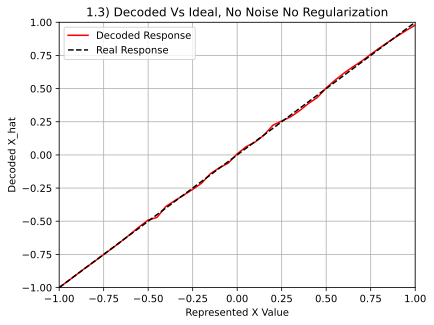

RMSE without noise without regularization:  0.01


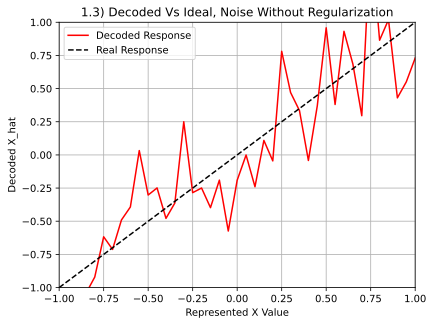

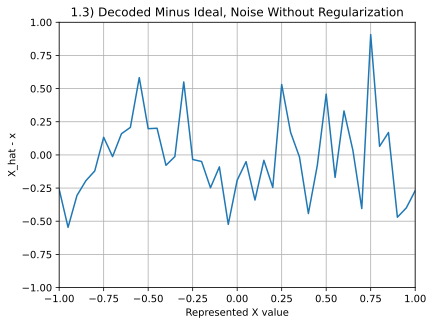

RMSE with noise without regularization:  0.321


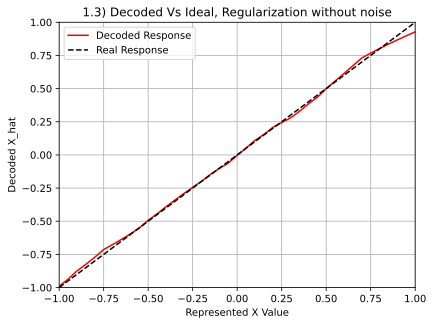

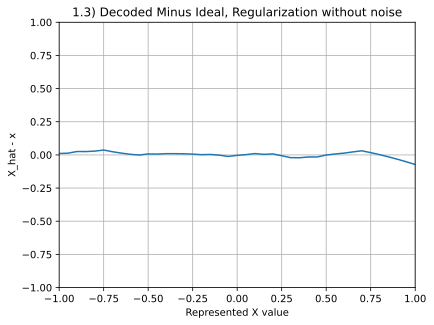

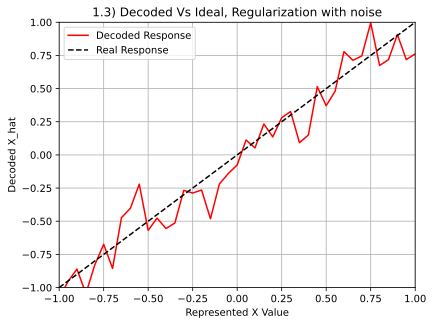

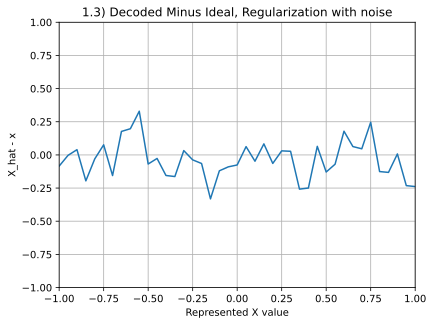

RMSE no noise with regularization:  0.021
RMSE with noise with regularization:  0.146


In [10]:
    # 1.3 C) [DONE]
    print("1.3C)")
    
    A = np.matrix(tuning_curves)
    X = np.matrix(x_linspace)
    
    # No Noise in A, D not regularized
    D = np.transpose(np.linalg.inv(A * np.transpose(A)) * A * np.transpose(X))
    X_hat = D*A
    plot_decoded_vs_ideal(x_linspace, X_hat, "1.3)", "No Noise No Regularization")
    
    rmse_no_noise_no_reg = get_RMSE_matrix(X, X_hat)
    print("RMSE without noise without regularization: ", rmse_no_noise_no_reg)
    
    # Noise in A, D not regularized
    ro = 0.2*np.amax(A)
    A_noisy = A + np.random.normal(0, ro, A.shape)
    X_hat_noisy = D * A_noisy
    plot_decoded_vs_ideal(x_linspace, X_hat_noisy, "1.3)", "Noise Without Regularization")
    
    rmse_with_noise_no_reg = get_RMSE_matrix(X, X_hat_noisy)
    print("RMSE with noise without regularization: ", rmse_with_noise_no_reg)
    
    #D regularized
    regularizer = N*pow(ro, 2) * np.eye(N, N)
    D_reg = np.transpose(np.linalg.inv(A * A.T + regularizer) * A * np.transpose(X))
    
    X_hat_reg = D_reg * A # No noise in A
    X_hat_noisy_reg = D_reg * A_noisy # Noise in A
    
    plot_decoded_vs_ideal(x_linspace, X_hat_reg, "1.3)", "Regularization without noise")
    plot_decoded_vs_ideal(x_linspace, X_hat_noisy_reg, "1.3)", "Regularization with noise")

    rmse_no_noise_with_reg = get_RMSE_matrix(X, X_hat_reg)
    print("RMSE no noise with regularization: ", rmse_no_noise_with_reg)
    
    rmse_with_noise_with_reg = get_RMSE_matrix(X, X_hat_noisy_reg)
    print("RMSE with noise with regularization: ", rmse_with_noise_with_reg)

# 2. Reperesentation of Vectors

## 2.1 Vector tuning curves

**a) Plotting 2D tuning curves.** Plot the tuning curve of an LIF neuron whose 2D preferred direction vector is at an angle of $\theta=-\pi/4$, has an $x$-intercept at the origin $(0,0)$, and has a maximum firing rate of $100 \mathrm{Hz}$.

In [11]:
#Derivations attached as 2_1A.png

A)


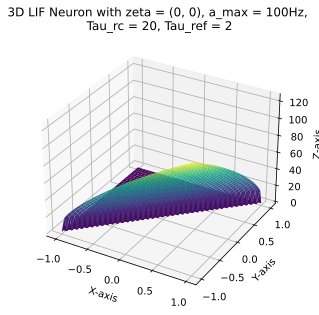

In [12]:
# Import numpy and matplotlib -- you shouldn't need any other libraries
import numpy as np
import matplotlib.pyplot as plt
from math import cos, sin, pi, exp
from scipy.optimize import curve_fit



Trc = 20 / 1000 # Given in ms, divide by 1000 to get s
Tref = 2 / 1000  # Given in ms, divide by 1000 to get s

def get_alpha(a_max):
    exponent = (Tref - 1/a_max) / Trc
    alpha = pow(1 - exp(exponent), -1) - 1
    
    return alpha

def get_LIF_3D(x, y, alpha, preferred_vector, J_bias):
    point = np.transpose([x, y])
    
    J = alpha * np.dot(point, preferred_vector) + J_bias
    
    if J <= 1:
        a = 0
    else:
        a = pow(Tref - Trc * np.log(1 - 1/J), -1)[0]
        
    return a
    
    

def generate_2D_tuning_curve(x_linspace, y_linspace):
    A = np.zeros((len(y_linspace), len(x_linspace)))
    
    preferred_angle_rads = -pi/4
    vector_mag = 1

    preferred_vector = np.array([
        [vector_mag * cos(preferred_angle_rads)], 
        [vector_mag * sin(preferred_angle_rads)]
    ])

    a_max = 100
    
    alpha = get_alpha(a_max)
    J_bias = 1
    
    x_idx = 0
    for x in x_linspace:
        y_idx = 0
        
        for y in y_linspace:
            
            a = get_LIF_3D(x, y, alpha, preferred_vector, J_bias)
            
            A[y_idx, x_idx] = a
            
            y_idx += 1
            
        x_idx += 1
        
    return A

def generate_2D_tuning_curve_unit_circle(x_linspace, y_linspace):
    A = []
    
    preferred_angle_rads = -pi/4
    vector_mag = 1

    preferred_vector = np.array([
        [vector_mag * cos(preferred_angle_rads)], 
        [vector_mag * sin(preferred_angle_rads)]
    ])

    a_max = 100
    
    alpha = get_alpha(a_max)
    J_bias = 1
    
    for x, y in zip(x_linspace, y_linspace):            
        a = get_LIF_3D(x, y, alpha, preferred_vector, J_bias)
        
        A.append(a)
        
    return A
            
            

def plot_3d(x_space, y_space, z_space, title):
    
    X, Y = np.meshgrid(x_space, y_space)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, z_space, cmap='viridis')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    ax.set_title(title)
    plt.show()
    
def cosFit(x, a, b, c, d):
    return (a * (np.cos(b * x +c))) + d
    
np.random.seed(18945)

# A) [DONE]
print("A)")

# Create a meshgrid of X and Y values
x_linspace = np.linspace(-1, 1, 41)
y_linspace = np.linspace(-1, 1, 41)
points_2D = np.zeros((2, 41**2))

idx = 0
for x in x_linspace:
    for y in y_linspace:
        points_2D[0][idx] = x
        points_2D[1][idx] = y
        idx += 1

A = generate_2D_tuning_curve(x_linspace, y_linspace)


plot_3d(x_linspace, y_linspace, A, "3D LIF Neuron with zeta = (0, 0), a_max = 100Hz, \nTau_rc = 20, Tau_ref = 2")



**b) Plotting the 2D tuning curve along the unit circle.** Plot the tuning curve for the same neuron as in a), but only considering the points around the unit circle, i.e., sample the activation for different angles $\theta$. Fit a curve of the form $c_1 \cos(c_2\theta+c_3)+c_4$ to the tuning curve and plot it as well.

In [13]:
    # B)
    print("B)")
    
    angles = np.linspace(0, 2*np.pi, 10000)
    
    x = np.cos(angles)
    y = np.sin(angles)
    
    tuning_curve_2D = generate_2D_tuning_curve_unit_circle(x, y)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(x, y, tuning_curve_2D, label="LIF neuron at unit circle")
    ax.set_title("Lif Neuron on Unit circle and Cos curve fit")
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_zlabel("Frequency")
    
    
    def func(thetas, a, b, c, d):

        return a + np.cos(b * thetas + c) + d

    popt, pcov = curve_fit(func, angles, tuning_curve_2D)
    
    ax.scatter(x, y, func(angles, *popt), label="fit")
    ax.legend()
    


B)


**c) Discussion.** What makes a cosine a good choice for the curve fit in 2.1b? Why does it differ from the ideal curve?

The cosine should be a good choice for the curve fit, as it should sweep up with the square root for half of the unit circle. It should differ from the ideal curve in that the ideal curve has a nonlinearity that makes any negative values 0, but a cos curve does not have that, so it would sweep below the xy plane when the ideal curve is 0.

## 2.2 Vector representation

**a) Choosing encoding vectors.** Generate a set of $100$ random unit vectors uniformly distributed around the unit circle. These will be the encoders $\vec e$ for $100$ neurons. Plot these vectors with a quiver or line plot (i.e., not just points, but lines/arrows to the points).

A)


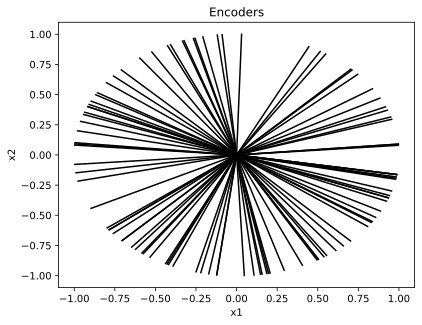

In [14]:
# Import numpy and matplotlib -- you shouldn't need any other libraries
import numpy as np
import matplotlib.pyplot as plt
from math import cos, sin, pi, sqrt

def plot_unit_vectors(encoders, decoders, title, decoder_scaling = 1):
    fig, ax = plt.subplots()

    for i in range(encoders.shape[1]):
        x_s = [0, encoders[0][i]]
        y_s = [0, encoders[1][i]]
        ax.plot(x_s, y_s, color = "black")
        
        x_s = [0, decoders[0][i] * decoder_scaling]
        y_s = [0, decoders[1][i] * decoder_scaling]
        ax.plot(x_s, y_s, color = "red")
        
        
    
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_title(title)
    ax.grid()
    fig.show()
    
def plot_unit_vectors_2(vectors, title):
    fig, ax = plt.subplots()

    for i in range(vectors.shape[1]):
        x_s = [0, vectors[0][i]]
        y_s = [0, vectors[1][i]]
        ax.plot(x_s, y_s, color = "black")
        
    ax.set_title("Encoders")
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")


np.random.seed(18945)

N = 100
num_encoders = N
dimension = 2


# A)
print("A)")

encoders = np.zeros((dimension, num_encoders))

for encoder_idx in range(num_encoders):
    angle = round(np.random.uniform(0, 2*pi), 2)
    
    encoders[0][encoder_idx] = cos(angle)
    encoders[1][encoder_idx] = sin(angle)

plot_unit_vectors_2(encoders, "1A) Encoders")



**b) Computing the identity decoder.** Use LIF neurons with the same properties as in question 1.3. When computing the decoders, take into account noise with $\sigma = 0.2\max(A)$. Plot the decoders in the same way you plotted the encoders.

B)


C:\Users\Keena\AppData\Local\Temp\ipykernel_10196\527371243.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


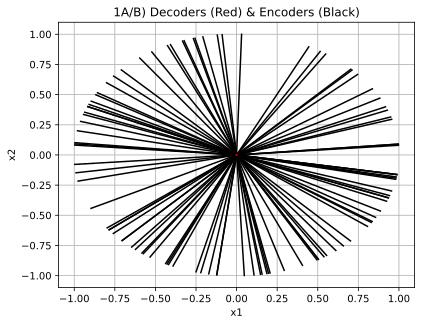

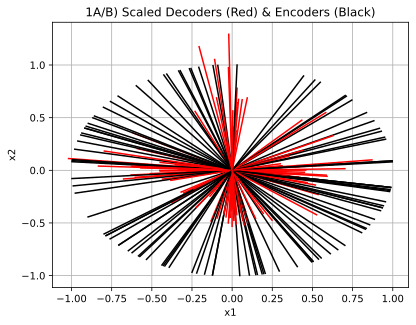

In [15]:
# B)
print("B)")

    
x_linspace = np.linspace(-1, 1, 41)
y_linspace = np.linspace(-1, 1, 41)
points_2D = np.zeros((2, 41**2))

idx = 0
for x in x_linspace:
    for y in y_linspace:
        points_2D[0][idx] = x
        points_2D[1][idx] = y
        idx += 1

tuning_curves = []
alphas = []


for i in range(num_encoders):
    
    a_max = np.random.uniform(100, 200)
    zeta = round(np.random.uniform(-0.95, 0.95), 2)
    encoder = [[encoders[0][i]], [encoders[1][i]]]
    
    alpha = get_alpha(a_max)
    alphas.append(alpha)
    J_bias = 1
    
    A = np.zeros((len(y_linspace), len(x_linspace)))
    tuning_curve = []
    xy_as_col = []
    
    for x_idx in range(41):
        for y_idx in range(41):
            x = x_linspace[x_idx]
            y = y_linspace[y_idx]
    
            a = get_LIF_3D(x, y, alpha, encoder, J_bias)
            A[y_idx, x_idx] = a
            
            tuning_curve.append(a)
            xy_as_col.append([x, y])
            
    tuning_curves.append(tuning_curve)
        
xy_as_col= np.matrix(xy_as_col).T
tuning_curves = np.matrix(tuning_curves)


A = tuning_curves
ro = 0.2 * np.amax(A)

regularizer = N*pow(ro, 2) * np.eye(N, N)
D_reg = np.transpose(np.linalg.inv(A * A.T + regularizer) * A * np.transpose(xy_as_col))


plot_unit_vectors(encoders, np.array(D_reg), "1A/B) Decoders (Red) & Encoders (Black)", 1)

plot_unit_vectors(encoders, np.array(D_reg), "1A/B) Scaled Decoders (Red) & Encoders (Black)", 2000)




**c) Discussion.** How do these decoding vectors compare to the encoding vectors?

#C)
print("C)")

C = """
The decoder vectors are MUCH smaller than the encoder vectors, on the scale to 10^-3 
times smaller. 

"""


**d) Testing the decoder.** Generate 20 random $\vec x$ values throughout the unit circle (i.e.,~with different directions and radiuses). For each $\vec x$ value, determine the neural activity $a_i$ for each of the 100 neurons. Now decode these values (i.e. compute $\hat{x} = D \vec a$) using the decoders from part b). Plot the original and decoded values on the same graph in different colours, and compute the RMSE.

D)
RMSE:  0.0009588576607732033



C:\Users\Keena\AppData\Local\Temp\ipykernel_10196\527371243.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


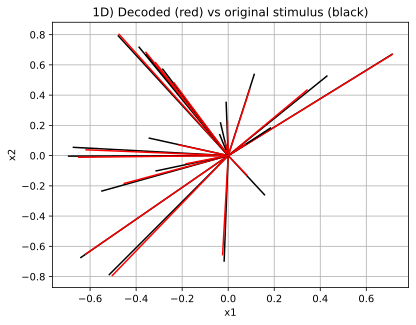

In [16]:

#D)
print("D)")

num_test_pts = 20
directions = np.random.uniform(0, 2 * np.pi, num_test_pts)
magnitudes = np.random.uniform(0, 1, num_test_pts)

test_x = []
test_y = []
test_points_as_col = []

for direction, mag in zip(directions, magnitudes):
    x = cos(direction) * mag
    y = sin(direction) * mag
    test_x.append(x)
    test_y.append(y)
    test_points_as_col.append([x, y])

test_points_as_col = np.matrix(test_points_as_col).T


# Need to determine A matrix

A = np.zeros((num_encoders, num_test_pts))
for i in range(num_encoders):
    
    encoder = [[encoders[0][i]], [encoders[1][i]]]
    
    alpha = alphas[i]
    J_bias = 1
    
    sample_idx = 0
    for x, y in zip(test_x, test_y):
        a = get_LIF_3D(x, y, alpha, encoder, J_bias)
        A[i, sample_idx] = a
        sample_idx += 1
            
fit = D_reg * A
vectors = np.array(fit)

plot_unit_vectors(vectors, np.array([test_x, test_y]), "1D) Decoded (red) vs original stimulus (black)")

rmse = np.sum(np.square(test_points_as_col - fit)) / (N * dimension)

print("RMSE: ", rmse)
print()




**e) Using encoders as decoders.** Repeat part d) but use the *encoders* as decoders. This is what Georgopoulos used in his original approach to decoding information from populations of neurons. Plot the decoded values and compute the RMSE. In addition, recompute the RMSE in both cases, but ignore the magnitude of the decoded vectors by normalizing before computing the RMSE.

E)
Angular RMSE for data decoded with encoders:  0.0023427404496020677


C:\Users\Keena\AppData\Local\Temp\ipykernel_10196\527371243.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


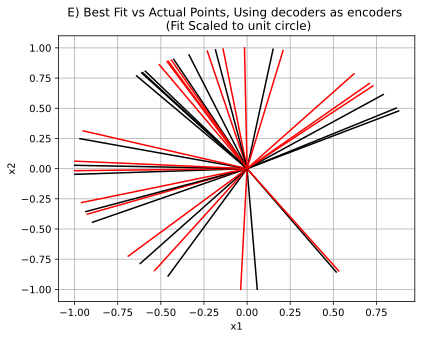

In [17]:
#E)
print("E)")

fit = np.matrix(encoders) * np.matrix(A)

vectors = np.array(fit)

for i in range(len(vectors[0])):
    x = vectors[0][i]
    y = vectors[1][i]
    magnitude = sqrt(x**2 + y**2)
    vectors[0][i] /= magnitude
    vectors[1][i] /= magnitude
    
for i in range(len(test_x)):
    x = test_x[i]
    y = test_y[i]
    
    magnitude = sqrt(x**2 + y**2)
    test_x[i] /= magnitude
    test_y[i] /= magnitude


test_points_as_col = np.matrix([test_x, test_y])

rmse = np.sum(np.square(test_points_as_col - vectors)) / (N * dimension)    
print("Angular RMSE for data decoded with encoders: ", rmse)

#fig, ax = plt.subplots()

plot_unit_vectors(vectors, np.array([test_x, test_y]), "E) Best Fit vs Actual Points, Using decoders as encoders \n (Fit Scaled to unit circle)")



**f) Discussion.** When computing the RMSE on the normalized vectors, using the encoders as decoders should result in a larger, yet still surprisingly small error. Thinking about random unit vectors in high dimensional spaces, why is this the case? What are the relative merits of these two approaches to decoding?

Since A is just random LIF neurons, it is a bit surprising that randomly generated encoders do a decent job of decoding the LIF neurons back into the stimulus.

It's especially odd, given that the encoder matrix basically tells the direction of fastest increase for any LIF neuron, and the decoder matrix tells the necessary scaling for each LIF neuron in x & y. Is there some kind of connection between those 2 matrices?
Perhaps the decoder matrix tends to scale along roughly the same vector as the encoder matrix for each neron? That could explain the low difference in angular error but high difference in magnitude.

Decoding with the actual decoders is more accurate, but requires computing the decoder matrix, which could become computationally expensive, especially with more neurons in higher dimensions.

Decoding with the randomly generated encoders is less accurate, but is doesnt require calculating the decoder matrix, and thus is less computationally expensive.